In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [70]:
match = pd.read_csv('matches.csv')
dlvr = pd.read_csv('deliveries.csv')

In [71]:
total_score_df = dlvr.groupby(['match_id','inning']).sum()['total_runs'].reset_index()


In [72]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [73]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [74]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [75]:
teams = ['Chennai Super Kings','Mumbai Indians','Kolkata Knight Riders','Rajasthan Royals','Delhi Capitals','Punjab Kings','Sunrisers Hyderabad',
         'Lucknow Super Giants','Gujarat Titans','Royal Challengers Bengaluru']


In [76]:
match_df['team1']=match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2']=match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1']=match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2']=match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['team1']=match_df['team1'].str.replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')
match_df['team2']=match_df['team1'].str.replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')

match_df['team1']=match_df['team1'].str.replace('Kings XI Punjab','Punjab Kings')
match_df['team2']=match_df['team2'].str.replace('Kings XI Punjab','Punjab Kings')



In [77]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]
match_df['match_id'] = match_df['match_id'].astype(int)
dlvr['match_id'] = dlvr['match_id'].astype(int)

In [78]:
match_df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Royal Challengers Bengaluru,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Punjab Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Delhi Capitals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Mumbai Indians,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Kolkata Knight Riders,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110


In [79]:
match_df['match_id'] = match_df['match_id'].astype(int)


In [80]:
dlvr_df = match_df.merge(dlvr,on='match_id')

In [81]:
dlvr_df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Royal Challengers Bengaluru,Royal Challengers Bangalore,...,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Royal Challengers Bengaluru,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Royal Challengers Bengaluru,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Royal Challengers Bengaluru,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Royal Challengers Bengaluru,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [82]:
dlvr_df = dlvr_df[dlvr_df['inning'] == 2]

In [83]:
dlvr_df.shape

(118987, 38)

In [84]:
dlvr_df['id']



,id
124,335982
125,335982
126,335982
127,335982
128,335982
...,...
246791,1426312
246792,1426312
246793,1426312
246794,1426312


In [85]:
match_df.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'match_id', 'total_runs'],
      dtype='object')

In [86]:
dlvr_df['current_runs'] = dlvr_df.groupby('match_id')['total_runs_y'].cumsum()

In [87]:
dlvr_df['runs_left'] = dlvr_df['total_runs_x'] - dlvr_df['current_runs']

In [88]:
dlvr_df['balls_left'] = 126 - (dlvr_df['over']*6 + dlvr_df['ball'])

In [89]:
dlvr_df['player_dismissed'] = dlvr_df['player_dismissed'].fillna("0")




In [90]:
dlvr_df['player_dismissed'] = dlvr_df['player_dismissed'].apply(
    lambda x: 0 if x == "0" else 1
)
dlvr_df['player_dismissed'] = dlvr_df['player_dismissed'].astype(int)


In [91]:
dlvr_df.head()


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_runs,runs_left,balls_left
124,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Royal Challengers Bengaluru,Royal Challengers Bangalore,...,0,1,NaN,0,0,NaN,NaN,1,221,125
125,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Royal Challengers Bengaluru,Royal Challengers Bangalore,...,1,1,wides,0,0,NaN,NaN,2,220,124
126,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Royal Challengers Bengaluru,Royal Challengers Bangalore,...,0,0,NaN,0,0,NaN,NaN,2,220,123
127,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Royal Challengers Bengaluru,Royal Challengers Bangalore,...,0,1,NaN,0,0,NaN,NaN,3,219,122
128,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Royal Challengers Bengaluru,Royal Challengers Bangalore,...,0,1,NaN,0,0,NaN,NaN,4,218,121


In [92]:
dlvr_df['wickets'] = dlvr_df.groupby(
    ['match_id', 'inning']
)['player_dismissed'].cumsum()


In [93]:
dlvr_df['wickets_left'] = 10 - dlvr_df['wickets']


In [94]:

# 1. Cumulative runs
dlvr_df['cumulative_runs'] = dlvr_df.groupby(
    ['match_id', 'inning']
)['total_runs_y'].cumsum()

# 2. Balls bowled so far
dlvr_df['balls_bowled'] = dlvr_df['over'] * 6 + dlvr_df['ball']

# 3. Overs completed
dlvr_df['overs_done'] = dlvr_df['balls_bowled'] / 6

# 4. Current Run Rate
dlvr_df['crr'] = dlvr_df.apply(
    lambda row: row['cumulative_runs'] / row['overs_done']
    if row['overs_done'] > 0 else 0,
    axis=1
)



In [95]:

# RUNS NEEDED
dlvr_df['runs_required'] = dlvr_df['target_runs'] - dlvr_df['cumulative_runs']
dlvr_df['runs_required'] = dlvr_df['runs_required'].apply(lambda x: x if x > 0 else 0)

# OVERS LEFT
dlvr_df['overs_left'] = (120 - dlvr_df['balls_bowled']) / 6

# REQUIRED RUN RATE (RRR) – only inning 2
dlvr_df['rrr'] = dlvr_df.apply(
    lambda row: row['runs_required'] / row['overs_left']
    if row['overs_left'] > 0 and row['inning'] == 2 else 0,
    axis=1
)





In [96]:
dlvr_df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,balls_left,wickets,wickets_left,cumulative_runs,balls_bowled,overs_done,crr,runs_required,overs_left,rrr
124,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Royal Challengers Bengaluru,Royal Challengers Bangalore,...,125,0,10,1,1,0.166667,6.0,222.0,19.833333,11.193277
125,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Royal Challengers Bengaluru,Royal Challengers Bangalore,...,124,0,10,2,2,0.333333,6.0,221.0,19.666667,11.237288
126,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Royal Challengers Bengaluru,Royal Challengers Bangalore,...,123,0,10,2,3,0.500000,4.0,221.0,19.500000,11.333333
127,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Royal Challengers Bengaluru,Royal Challengers Bangalore,...,122,0,10,3,4,0.666667,4.5,220.0,19.333333,11.379310
128,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Royal Challengers Bengaluru,Royal Challengers Bangalore,...,121,0,10,4,5,0.833333,4.8,219.0,19.166667,11.426087


In [97]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [98]:
dlvr_df['result'] = dlvr_df.apply(result,axis=1)


In [99]:
final_df = dlvr_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]


In [100]:
final_df = final_df.sample(final_df.shape[0])


In [101]:
final_df.sample()


,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
86898,Rajasthan Royals,Sunrisers Hyderabad,Delhi,119,115,0,132,7.090909,6.605505,1


In [102]:
final_df.dropna(inplace=True)


In [103]:
final_df = final_df[final_df['balls_left'] != 0]


In [104]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [105]:
X_train


,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
230618,Lucknow Super Giants,Rajasthan Royals,Jaipur,129,74,4,193,7.384615,11.470588
155508,Delhi Capitals,Royal Challengers Bangalore,Bengaluru,2,16,6,149,8.018182,1.800000
217897,Sunrisers Hyderabad,Mumbai Indians,Hyderabad,65,43,4,192,9.180723,10.702703
130282,Delhi Daredevils,Mumbai Indians,Mumbai,113,81,6,142,3.866667,9.120000
157808,Sunrisers Hyderabad,Delhi Capitals,Hyderabad,125,103,0,155,7.826087,7.793814
...,...,...,...,...,...,...,...,...,...
113501,Kolkata Knight Riders,Mumbai Indians,Mumbai,53,40,4,171,8.232558,9.529412
132341,Delhi Daredevils,Sunrisers Hyderabad,Delhi,22,23,4,185,9.495146,8.117647
26302,Deccan Chargers,Royal Challengers Bangalore,Centurion,93,72,1,170,8.555556,8.545455
230835,Mumbai Indians,Gujarat Titans,Ahmedabad,134,105,2,168,9.714286,8.181818


In [106]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse_output=False, drop='first'),
     ['batting_team', 'bowling_team', 'city'])
],
remainder='passthrough')


In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [108]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [109]:
pipe.fit(X_train,y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [110]:
y_pred = pipe.predict(X_test)


In [111]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8124363797300288

In [112]:
pipe.predict_proba(X_test)[10]


array([0.95726009, 0.04273991])

In [113]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))


In [114]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target


In [115]:
dlvr_df['id'].unique()

array([ 335982,  335983,  335984, ..., 1426310, 1426311, 1426312])

In [116]:
temp_df,target = match_progression(dlvr_df,1426310,pipe)
temp_df

Target- 172


,end_of_over,runs_after_over,wickets_in_over,lose,win
246247,1,2,10,37.0,63.0
246253,2,4,0,37.6,62.4
246259,3,16,0,22.5,77.5
246265,4,13,0,15.0,85.0
246271,5,10,0,11.6,88.4
246277,6,2,-1,22.5,77.5
246283,7,17,0,12.2,87.8
246289,8,10,0,9.3,90.7
246295,9,6,0,8.9,91.1
246301,10,5,-1,15.3,84.7


Text(0.5, 1.0, 'Target-172')

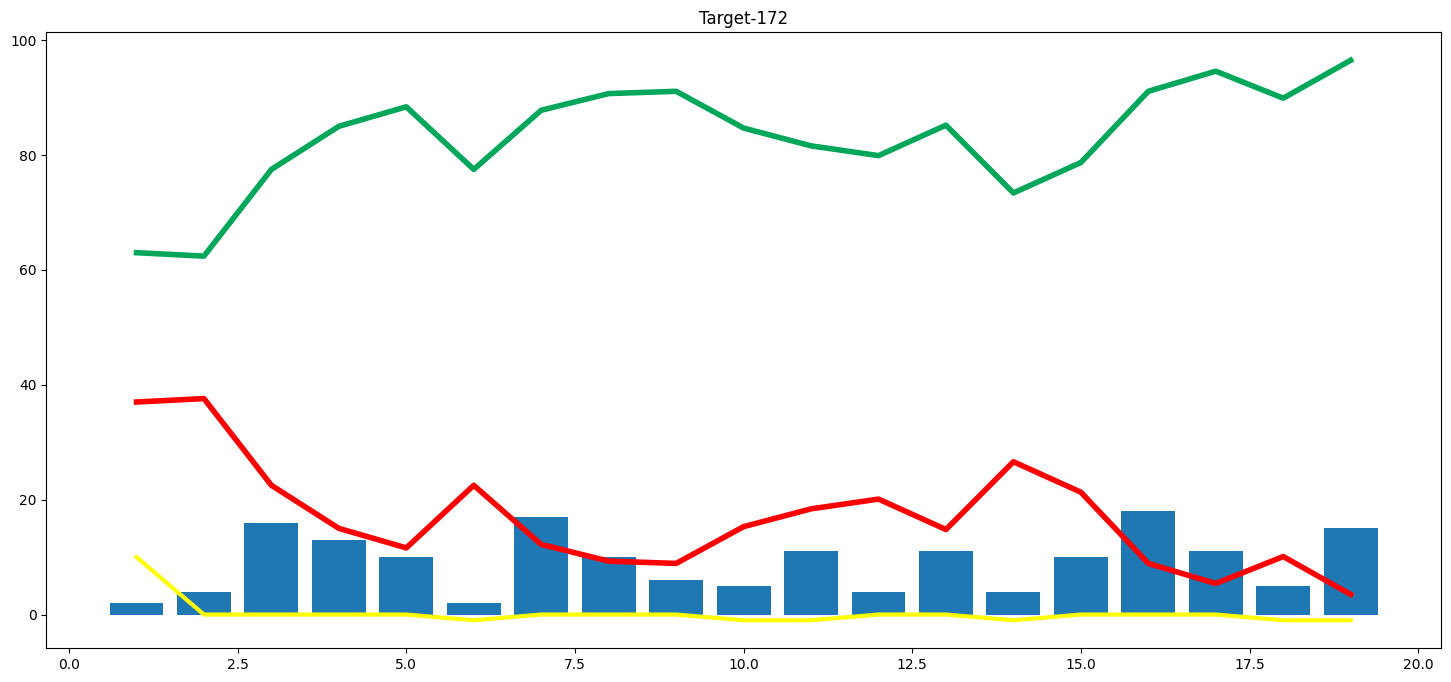

In [117]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [118]:
teams

['Chennai Super Kings',
 'Mumbai Indians',
 'Kolkata Knight Riders',
 'Rajasthan Royals',
 'Delhi Capitals',
 'Punjab Kings',
 'Sunrisers Hyderabad',
 'Lucknow Super Giants',
 'Gujarat Titans',
 'Royal Challengers Bengaluru']

In [119]:
dlvr_df['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi', nan,
       'Indore', 'Bengaluru', 'Dubai', 'Sharjah', 'Navi Mumbai',
       'Lucknow', 'Guwahati', 'Mohali'], dtype=object)

In [120]:
import pickle

In [121]:
filename = 'ipl.pkl'

In [122]:
pickle.dump(pipe,open(filename,'wb'))


In [123]:
!pip install streamlit -q



In [124]:
%%writefile app.py
import streamlit as st
st.title('ipl')
import pickle
import pandas as pd

teams = ['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

cities = ['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', 'Mohali', 'Bengaluru']

df = pickle.load(open('/content/ipl.pkl','rb'))
st.title('IPL Win Predictor')

col1, col2 = st.columns(2)

with col1:
    batting_team = st.selectbox('Select the batting team',sorted(teams))
with col2:
    bowling_team = st.selectbox('Select the bowling team',sorted(teams))

selected_city = st.selectbox('Select host city',sorted(cities))

target = st.number_input('Target')

col3,col4,col5 = st.columns(3)

with col3:
    score = st.number_input('Score')
with col4:
    overs = st.number_input('Overs completed')
with col5:
    wickets = st.number_input('wickets out')

if st.button('Predict Probability'):
    runs_left = target - score
    balls_left = 120 - (overs*6)
    wickets = 10 - wickets
    crr = score/overs
    rrr = (runs_left*6)/balls_left

    input_df = pd.DataFrame({'batting_team':[batting_team],'bowling_team':[bowling_team],'city':[selected_city],'runs_left':[runs_left],'balls_left':[balls_left],'wickets':[wickets],'total_runs_x':[target],'crr':[crr],'rrr':[rrr]})

    result = df.predict_proba(input_df)
    loss = result[0][0]
    win = result[0][1]
    st.header(batting_team + "- " + str(round(win*100)) + "%")
    st.header(bowling_team + "- " + str(round(loss*100)) + "%")


Overwriting app.py


In [125]:
!curl https://loca.lt/mytunnelpassword


34.61.60.80

In [126]:
!streamlit run app.py & npx localtunnel --port 8501

⠙

⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼your url is: https://neat-drinks-hang.loca.lt

  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.61.60.80:8501

  Stopping...
^C
